<a href="https://colab.research.google.com/github/sudeepds/mini-projects/blob/main/Amazon_Review_Helpfulness_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Business Understanding
 Reference: https://t-lanigan.github.io/amazon-review-classifier/

The quality of the comments made on internet forums has always suffered due to anonymity of it’s users. When users comments on, for instance, a YouTube video, there is no repercussion for what they say, and the dialog generated is often not helpful. Different websites have tried different methods for extracting more useful comments. Reddit uses an up-vote system, Quora fosters a community that values high quality responses over low quality ones, and Amazon allows for its users to to rate the “helpfulness” of reviews left on their products. Amazon’s system, in particular, then allows for the higher rated comments to be displayed at the top of the review forum so that new users can see the top rated comments in order to help them make their own purchasing decisions.

Even though Amazon’s helpfulness rating system seems to work on the surface level, poor quality comments still seem to be at the top of their review forms. Having poor quality reviews hurts Amazon’s business, as a major reason that people are willing to buy consumer goods on-line without seeing the items themselves, is that they have access to others peoples opinions of the item.

## Problem Statement
The problem being addressed in this project is the poor quality of Amazon reviews at the top of the forum despite the “helpfulness” rating system. The problem arises from the “free pass” given to new reviews to be placed at the top of the forum, for a chance to be rated by the community. The proposed solution to this problem is to use machine learning techniques to design a system that “pre-rates” new reviews on their “helpfulness” before they are given a position at the top of the forum. This way, poor quality reviews will be more unlikely to be shown at the top of the forum, as they do not get the “freepass” because they are new. The proposed system will use a set of Amazon review data to train itself to predict a helpfulness classification (helpful, or not helpful) for new input data.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. Data Acquisition
 
For the problem identified by you, students have to find the data source themselves which should be a website which has the required data in it. You have to write Python crawler code to scrape data from the respective website rather than downloading ready-made dataset as such from sources like Kaggle etc. 

(Data downloaded from website like Kaggle will be awarded negative marks.)

## 2.1 Code for scraping data from website



In [2]:
##---------Type the code below this line------------------##
#installations
!pip install bs4
!pip install requests


In [25]:
#imports
import requests
from bs4 import BeautifulSoup
import pandas as pd
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from six.moves import cPickle as pickle
import gzip
import seaborn as sns
import string
from time import time
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords')
stops = set(stopwords.words("english"))


from IPython.display import display # Allows the use of display() for DataFrames


import warnings
warnings.filterwarnings('ignore')

# Config the matlotlib backend as plotting inline in IPython
%matplotlib inline

# Lets define some helpful constants
DATASET_NAME = 'reviews_Apps_for_Android_5.json.gz'

# A size for figures
FIG_SIZE = (14,8)

#Random state for classifiers
RAN_STATE = 42

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
review_id = []
review_text = []
overall_review_rating = []
review_helpful_count = []

In [ ]:
HEADERS = ({'User-Agent':
            'Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
            AppleWebKit/537.36 (KHTML, like Gecko) \
            Chrome/90.0.4430.212 Safari/537.36',
            'Accept-Language': 'en-US, en;q=0.5'})

# function to Scrape the data
def getdata(url):
    r = requests.get(url, headers=HEADERS)
    return r.text
  
# function to download the html code from a given url 
def html_code(r):  
    htmldata = r.text
    soup = BeautifulSoup(htmldata, 'html.parser')

    return (soup)

base_url = "https://www.amazon.in/New-Apple-iPhone-11-128GB/product-reviews/B08L89VM35/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews"
  
# soup = html_code(url)
# print(soup)

In [ ]:
def review_data(soup):
    # finding the Html tag with find()
    # and converting into string

  for div in soup.find_all(class_="a-section review aok-relative"):       
      div_id = div['id']     
      review_id.append(div_id)
      for rev in div.find_all("span", {'data-hook':"review-body"}):
        review_text.append(rev.text)

      for rating in div.find_all("i", {'data-hook':"review-star-rating"}):
        txt_list = rating.text.split()
        overall_review_rating.append(txt_list[0])
    
      for helpful_count in div.find_all("span", {'data-hook': 'helpful-vote-statement'}):
        txt_list = helpful_count.text.split()
        review_helpful_count.append(txt_list[0])
      
      #review_text.extend([''] * (len(review_id)-len(review_text)))
      overall_review_rating.extend(['0'] * (len(review_id)-len(overall_review_rating)))
      review_helpful_count.extend(['0'] * (len(review_id)-len(review_helpful_count)))

  
  
# review_data(soup)
#print(review_id)
# print(review_text[1])
# print(overall_review_rating)
# print(review_helpful_count)
#print(len(review_id))

In [ ]:
def page_iterator(url, page_start):
  page_url = url + "&pageNumber=" + str(page_start)
  r = requests.get(page_url, headers=HEADERS)
  last_page_number = i = page_start
  while r.status_code == 200:
    soup = html_code(r)
    review_data(soup)
    page_url = url + "&pageNumber=" + str(i)
    #print(page_url)
    r = requests.get(page_url, headers=HEADERS)
    last_page_number = i
    i+=1
  print(last_page_number)
  return last_page_number



In [ ]:
def caller():
  pagination = 0
  while pagination < 4000:
    pagination = page_iterator(base_url, pagination+1)


In [ ]:
caller()

In [ ]:
print(len(review_id))
print(len(overall_review_rating))
print(len(review_text))
print(len(review_helpful_count))

5010
5010
5010
5010


In [ ]:
## test cell, remove before finalizing
test_review_helpful_count = []
test_review_ids = []
test_url = "https://www.amazon.in/Vincarosea-Womens-Printed-Loungewear-Nightwear/dp/B09J2MBWVD/ref=sr_1_4_sspa?pf_rd_i=21251246031&pf_rd_m=A1VBAL9TL5WCBF&pf_rd_p=9a78f17e-e150-4fab-9c31-e434566fdaad&pf_rd_r=ECJHM091BR0EEP8P2R3S&pf_rd_s=merchandised-search-6&pf_rd_t=30901&qid=1645262540&s=apparel&sr=1-4-spons&smid=A21ZG1IIT18ZOG&spLa=ZW5jcnlwdGVkUXVhbGlmaWVyPUExNjlFWVJLSDFPTUYzJmVuY3J5cHRlZElkPUEwOTQzNzM0MTJJQkoxNlVOOEsyJmVuY3J5cHRlZEFkSWQ9QTAyOTg4NzcxMUxCUDVVS0IwWEVWJndpZGdldE5hbWU9c3BfYXRmX2Jyb3dzZSZhY3Rpb249Y2xpY2tSZWRpcmVjdCZkb05vdExvZ0NsaWNrPXRydWU&th=1&psc=1"
test_r = requests.get(test_url, headers=HEADERS)

test_htmldata = test_r.text
test_soup = BeautifulSoup(test_htmldata, 'html.parser')
for div in test_soup.find_all(class_="a-section review aok-relative"):
  div_id = div['id']
  test_review_ids.append(div_id)
  print(div_id)
  for helpful_count in div.find_all("span", {'data-hook': 'helpful-vote-statement'}):
        print("inside 2nd for loop")
        txt_list = helpful_count.text.split()
        print(txt_list[0])
        test_review_helpful_count.append(txt_list[0])
        print(test_review_helpful_count)
  test_review_helpful_count.extend(['0'] * (len(test_review_ids)-len(test_review_helpful_count)))

print(test_review_ids)
print(test_review_helpful_count)




## 2.2 Code for converting the above scraped data into a dataframe

In [ ]:
##---------Type the code below this line------------------## 
# initialise data of lists.
data = {'reviewId': review_id,
        'overallRating': overall_review_rating,        
        'review': review_text,
        'helpfulUpvotes': review_helpful_count}
  
# Create DataFrame
df = pd.DataFrame(data)
  
# Save the output.
df.to_csv('amazon_review.csv')


In [91]:
# When using pre-scraped csv from above
df = pd.read_csv('drive/MyDrive/Datasets/amazon_review.csv', index_col=0)

## 2.3 Confirm the data has been correctly by displaying the first 5 and last 5 records.

In [92]:
##---------Type the code below this line------------------##
print(df.head(5))
print(df.tail(5))


         reviewId  ...  helpfulUpvotes
0  R2175DKWOQ16BI  ...          30,049
1  R2P0NP0OWNJQFU  ...          11,577
2   R51EDHN250S9U  ...           1,984
3  R24K8G1ABRUZHM  ...           1,855
4  R3VGT8XZEFGC9U  ...           1,584

[5 rows x 4 columns]
            reviewId  ...  helpfulUpvotes
5005  R3L0GMGAEO5OIK  ...               0
5006  R3P4C96PHDI9Y8  ...               0
5007  R2P2BYL4BN9KWC  ...               0
5008  R2MN9X4VQNX13R  ...               0
5009  R23JA1C7BRPIEY  ...             One

[5 rows x 4 columns]


## 2.4 Display the column headings, statistical information, description and statistical summary of the data.

In [93]:
##---------Type the code below this line------------------##
print("-----------------Dataframe basic info------------------")
print(df.info())

print("\n\n-----------------Dataframe Description------------------\n\n")
print(df.describe())

print("\n\n-----------------Dataframe Statistical Summary------------------\n\n")
print(df.groupby('overallRating').describe())

print("\n-----------------overallRating column Statistical Summary------------------\n")
print("Mean Overall Rating: ", df.overallRating.astype(float).mean())
print("Max Overall Rating: ", df.overallRating.astype(float).max())
print("Min Overall Rating: ", df.overallRating.astype(float).min())
print("Median of  Overall Rating: ", df.overallRating.astype(float).median())

print("\n-----------------review column Summary------------------\n")
print("Count of column review: ", df.review.count())

print("\n-----------------helpfulUpvotes column Summary------------------\n")
print("Count of column helpfulUpvotes: ", df.helpfulUpvotes.count())

print("\n-----------------reviewId column Summary------------------\n")
print("Count of column reviewId: ", df.reviewId.count())

-----------------Dataframe basic info------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5010 entries, 0 to 5009
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewId        5010 non-null   object
 1   overallRating   5010 non-null   int64 
 2   review          4992 non-null   object
 3   helpfulUpvotes  5010 non-null   object
dtypes: int64(1), object(3)
memory usage: 195.7+ KB
None


-----------------Dataframe Description------------------


       overallRating
count    5010.000000
mean        4.083234
std         1.460076
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000


-----------------Dataframe Statistical Summary------------------


              reviewId                         ... helpfulUpvotes           
                 count unique             top  ...         unique  top  freq
overallRating                               

## 2.5 Write your observations from the above. 
1. Size of the dataset
2. What type of data attributes are there?
3. Is there any null data that has to be cleaned?

Obervations:
The dataset has total 5010 rows and 4 columns. 
The attribute *overallRating* is of type float and rest are of type object . It might need a type conversion for attribute *helpfulUpvotes* to numeric. And at the end, *helpfulUpvotes* need to be converted to boolean(0,1) so that model can be applied.
It has null values so no cleanup needed.



# 3. Data Preparation

## 3.1 Display how many unique values are present in each attribute


In [94]:
##---------Type the code below this line------------------##
print("Unique values of column reviewId: ", len(df.reviewId.unique()))
print("Unique values of column overallRating: ", len(df.overallRating.unique()))
print("Unique values of column review: ", len(df.review.unique()))
print("Unique values of column helpfulUpvotes: ", len(df.helpfulUpvotes.unique()))

Unique values of column reviewId:  5000
Unique values of column overallRating:  5
Unique values of column review:  4778
Unique values of column helpfulUpvotes:  83


## 3.2 Check for the presence of duplicate data, identify the attributes with duplicate data, report the attributes. Mention the method adopted to remove duplicate data if present. Report the results again.

In [95]:
##---------Type the code below this line------------------##

print("-----------------Checking for the presence of duplicate data based on reviewId as its the identifier--------------------------")
#As reviewId is the unique identifier for a review, identifying duplicated based on it.
print("Number of duplicate rows based on reviewId: ", df.reviewId.duplicated().sum())

print('\n\n\n----------Removing the duplicate rows. Method used is Replace considering the low count and irrelevance of such record---------------------\n\n\n')
new_df = df.drop_duplicates(subset ="reviewId", keep = 'first', inplace = False)
print(new_df.info())

print('\n\n\n----------------Info of unduplicated dataframe-----------------------------------\n')
print("Number of duplicate rows based on reviewId: ", new_df.reviewId.duplicated().sum())




-----------------Checking for the presence of duplicate data based on reviewId as its the identifier--------------------------
Number of duplicate rows based on reviewId:  10



----------Removing the duplicate rows. Method used is Replace considering the low count and irrelevance of such record---------------------



<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 5009
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewId        5000 non-null   object
 1   overallRating   5000 non-null   int64 
 2   review          4982 non-null   object
 3   helpfulUpvotes  5000 non-null   object
dtypes: int64(1), object(3)
memory usage: 195.3+ KB
None



----------------Info of unduplicated dataframe-----------------------------------

Number of duplicate rows based on reviewId:  0


## 3.3 Show whether there are any missing values in each attribute. Report the same.


In [96]:
##---------Type the code below this line------------------##
import numpy as np
print('Indices for missing values in reviewId column: ', np.where(pd.isnull(new_df['reviewId'])))
print('Indices for missing values in overallRating column: ', np.where(pd.isnull(new_df['overallRating'])))
print('Indices for missing values in helpfulUpvotes column: ', np.where(pd.isnull(new_df['helpfulUpvotes'])))
print('Indices for missing values in review column: ', np.where(pd.isnull(new_df['review'])))

Indices for missing values in reviewId column:  (array([], dtype=int64),)
Indices for missing values in overallRating column:  (array([], dtype=int64),)
Indices for missing values in helpfulUpvotes column:  (array([], dtype=int64),)
Indices for missing values in review column:  (array([1747, 1781, 1886, 2495, 2602, 2750, 2807, 3001, 3109, 3126, 3212,
       3434, 3440, 4078, 4300, 4334, 4467, 4535]),)


In [97]:
for i in np.where(pd.isnull(new_df['review'])):
  print(new_df.iloc[i].helpfulUpvotes)

1757      3
1791      3
1896      3
2505    One
2612      2
2760      0
2817      2
3011      2
3119      2
3136      2
3222      0
3444      0
3450    One
4088      0
4310      0
4344      0
4477      0
4545    One
Name: helpfulUpvotes, dtype: object


## 3.4 Clean the missing data using any imputation technique, mention the method used and again report the change after cleaning the data.

In [98]:
##---------Type the code below this line------------------##
print('We can see from above that only the column review has empty values. Imputing this column value is not a good idea as \n')
print('1. These columns does have upvotes so it cannot be removed from processing \n')
print('2. In the next steps we would be applying Text Feature Generation Techniques where adding a default review text would mislead the model \n')
print('3. In this case, empty values for review would not cause any adverse issue')



We can see from above that only the column review has empty values. Imputing this column value is not a good idea as 

1. These columns does have upvotes so it cannot be removed from processing 

2. In the next steps we would be applying Text Feature Generation Techniques where adding a default review text would mislead the model 

3. In this case, empty values for review would not cause any adverse issue


## 3.5 Check if all the attributes are following the same format and are consistent. If not, report all such attributes and what inconsistencies are present.

In [99]:
##---------Type the code below this line------------------##

print(new_df.reviewId.unique())
print('Review Id column values are following same format consistently. \n\n')
print(new_df.overallRating.unique())
print('overallRating column values are following same format consistently. \n\n')
print(new_df.review.unique())
print('review column values are following same format consistently. \n\n')
print(new_df.helpfulUpvotes.unique())
print('It can be seen that helpfulUpvotes column has inconsistent data format where few rows have literal One instead of numeric 1')



['R2175DKWOQ16BI' 'R2P0NP0OWNJQFU' 'R51EDHN250S9U' ... 'R2P2BYL4BN9KWC'
 'R2MN9X4VQNX13R' 'R23JA1C7BRPIEY']
Review Id column values are following same format consistently. 


[1 5 2 3 4]
overallRating column values are following same format consistently. 


["\n\n  Please do not buy expensive product like iphone from Amazon, i had very bad exp, the charger cord was missing and had sound quality issues. Amazon initial told charger doesn't come in box and when i challenged it they asked reimburse the cord amount, but i requested a replacement, after some days they called me and informed that they dont take responsibility of missing items, and 10 day replacement policy they dont follow, you can read the email conversation attached  here where i mentioned every thing, i have the call recordings as well. At last they denied the phone replacement and even to provide the missing cord. For any damage or quality issues they said amazon is not responsible.\n\n"
 '\n\n  Bought the mobile from app

## 3.6 Correct the data if there are inconsistencies from 3.5. Report or print the data after correction.

In [100]:
##---------Type the code below this line------------------##
new_df['helpfulUpvotes'] = new_df['helpfulUpvotes'].replace(to_replace=['One'], value='1')

print(new_df.helpfulUpvotes.unique())

['30,049' '11,577' '1,984' '1,855' '1,584' '1,491' '1,091' '758' '931'
 '704' '458' '424' '514' '328' '407' '330' '326' '251' '273' '238' '175'
 '180' '140' '136' '216' '134' '111' '153' '104' '126' '92' '96' '73' '71'
 '97' '81' '77' '53' '48' '36' '56' '41' '49' '54' '65' '47' '37' '43'
 '28' '27' '29' '26' '30' '46' '20' '39' '22' '24' '17' '18' '21' '13'
 '19' '31' '42' '33' '14' '11' '16' '15' '12' '8' '9' '10' '23' '7' '5'
 '4' '6' '3' '2' '1' '0']


## 3.7 Identify the target variables.


In [101]:
##---------Type the code below this line------------------##
print('Adding a new boolean column isHelpful based on existing column helpfulUpvotes\n')
print('\n If a review has even a single helpfulUpvote then isHelpful is 1 else its 0 \n\n')
new_df['isHelpful'] = new_df.helpfulUpvotes.apply(lambda x: 1 if x != '0' else 0)
print(new_df.tail())
print(new_df.head())
print('\n\n TARGET VARIABLE is isHelpful \n\n\n ')


Adding a new boolean column isHelpful based on existing column helpfulUpvotes


 If a review has even a single helpfulUpvote then isHelpful is 1 else its 0 


            reviewId  overallRating  ... helpfulUpvotes isHelpful
5005  R3L0GMGAEO5OIK              4  ...              0         0
5006  R3P4C96PHDI9Y8              5  ...              0         0
5007  R2P2BYL4BN9KWC              5  ...              0         0
5008  R2MN9X4VQNX13R              5  ...              0         0
5009  R23JA1C7BRPIEY              5  ...              1         1

[5 rows x 5 columns]
         reviewId  overallRating  ... helpfulUpvotes isHelpful
0  R2175DKWOQ16BI              1  ...         30,049         1
1  R2P0NP0OWNJQFU              1  ...         11,577         1
2   R51EDHN250S9U              5  ...          1,984         1
3  R24K8G1ABRUZHM              1  ...          1,855         1
4  R3VGT8XZEFGC9U              1  ...          1,584         1

[5 rows x 5 columns]


 TARGET VARIABLE is i

## 3.8 Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)


In [102]:
##---------Type the code below this line------------------##
X = new_df[['reviewId', 'review', 'overallRating', 'helpfulUpvotes']].copy()
y = new_df[['isHelpful']]
print(X.head())
print(y.head())

         reviewId  ... helpfulUpvotes
0  R2175DKWOQ16BI  ...         30,049
1  R2P0NP0OWNJQFU  ...         11,577
2   R51EDHN250S9U  ...          1,984
3  R24K8G1ABRUZHM  ...          1,855
4  R3VGT8XZEFGC9U  ...          1,584

[5 rows x 4 columns]
   isHelpful
0          1
1          1
2          1
3          1
4          1


## 3.9 Discretize the target variable or perform one-hot encoding on the target or any other as and if required.


In [103]:
##---------Type the code below this line------------------##

print('Target variable isHelpful is already has discrete values 0 and 1')

Target variable isHelpful is already has discrete values 0 and 1


# 4. Data Exploration using various plots

## 4.1 Scatter plot of each attribute with the target.

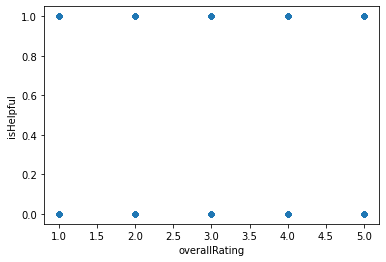

In [104]:
##---------Type the code below this line------------------##
new_df.plot.scatter(x='overallRating', y='isHelpful')

## 5.1 Display correlation heatmap of each attribute against the target and report which features are significant.



 Heatmap showing only OverallRating and isHelpful as these are the only numeric attributes.




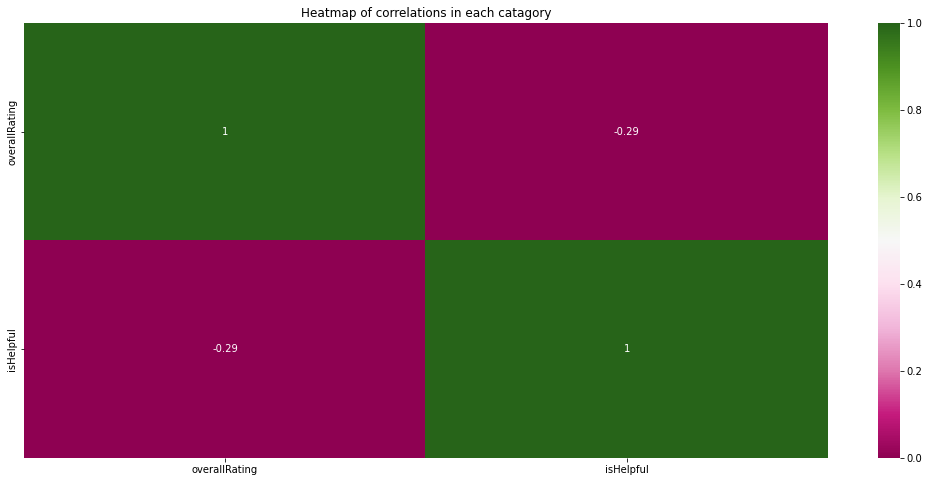

In [105]:
##---------Type the code below this line------------------##
import seaborn as sns
import matplotlib.pyplot as plt
correlations = new_df.corr()
plt.figure(figsize = (18,8))
plt.title("Heatmap of correlations in each catagory")
_ = sns.heatmap(correlations, vmin=0, vmax=1, annot=True, cmap="PiYG")
print('\n\n Heatmap showing only OverallRating and isHelpful as these are the only numeric attributes.\n\n')

# Text Feature Generation


*   First we will convert the review text into lower case
*   We will also remove punctuation as usually punctuations make the learning model perform poorly. This does have a trade off as as not having punctuation will make a review harder to understand.



In [106]:
import string
new_df.loc[:, 'review'] = new_df.review.str.lower()
new_df['review'] = new_df.review.replace(to_replace=["\n"], value="", regex=True)
new_df['review'] = new_df['review'].replace(to_replace= np.nan, value='')
def remove_punctuation(text):
    return text.translate(string.punctuation.translate('"'))



In [107]:
new_df['review']=new_df['review'].apply( lambda x: remove_punctuation(x))


We will use TF-IDF vectorizer to generate features from review text. Before that, we will use below techniques:

*   Stemming: To take only the principal word from words like "vectorizer" to "vector".
*   Tokenizing: To split sentences to individual words. 
*   ngrams: To make group of words to create additional features. If ngrams is set to 2 then it will split the sentence into a group of two words. So, the sentence "I am Thor" will be split into "I am" and "am Thor".
*   Remove Stop Words: To remove words like "the" "a" "it" etc as these are not relevant.



In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer

#create a stemmer
stemmer = SnowballStemmer("english")

#lets define our own tokenizing function that we will pass into the TFIDFVectorizer. We will also stem the words here.
def tokens(x):
    x = x.split()
    stems = []
    [stems.append(stemmer.stem(word)) for word in x]
    return stems

# min_df param is kept very low. it means we will include a word in the vector only if its part of 1% of the documents. This is to make sure we do not 
# include typos as if a word is that rare then most likely its a typo.
vectorizer = TfidfVectorizer(tokenizer = tokens, stop_words = 'english', ngram_range=(1, 1), min_df = 0.01)
#fit the vectorizers to the data.
features = vectorizer.fit_transform(new_df['review'])
features


<5000x286 sparse matrix of type '<class 'numpy.float64'>'
	with 46927 stored elements in Compressed Sparse Row format>

# Benchmark Model
We will try with below models:

*   Logistic Regression: Logistic Regression is used frequently for text classification

>>Pros:Logistic regression can be updated after is has already been trained, meaning that new reviews can be used to teach the algorithm after it has already been training.

>>Cons: Logistic regression is not as fast as the naive bayes methods

>>Selection Reason: The ability to update itself after its initial training period may prove to be valuable.


*   Random Forest: A Random Forest is a ensembling algorithm that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting.
>>Pros: The strength of the Random Forest classifier comes from the formation of it's trees. Because it is formed from "random" subsets of the data, and the final result is compared to other trees that have also been formed "randomly", the algorithm guards well against "overfitting" from noisy data points that may have more influence on a single decision tree algorithm. The "random" formation of the trees ensures that there is little chance for a strong bias to be present in the data during tree construction. **Random Forests also work well with high dimensional data, as in the case of our TFIDF features.**

>>Cons: A lot of trees are necessary to get stable estimates of variable importance and proximity. This can lead to a large amount of space in memory being needed to store the trees. Additionally, the trees need to be re-trained when new data is being introduced, unlike Naive Bayes.
Its training complexity is given as O(M √d n log n) where d is the number of features and M is the number of trees.

>>Reason for selection: Since random forest works well with high dimensional data, as is competitive with other algorithms such as SVM without the high training cost.

*   AdaBoost:  AdaBoost or "adaptive boosting" begins by fitting a "weak" classifier on the original dataset. It then fits additional copies of the classifier on the same dataset and adjusts the weights of incorrectly classified instances such that subsequent classifiers focus more on difficult cases. The adjustment is done using the SAMME-R algorithm (for classification). **Adaboost has been used in robust real time face detection**

>>Pros:  Because of it's boosting property, Adaboost will not suffer from overfitting caused by too many training periods in the boosting algorithm. Theoretically, the algorithm should produce better and better results the more it is trained.

>>Cons: Adaboost is slow to train, relative to GaussianNB (actual training complexity could not be found).

>>Reason for selection: It will be interesting to measure the performance of the boosting method of Adaboost vs the vote method for the RF algorithm, as both use decision trees and differ only in the method in which the tree are ensembled together for the final classification.



In [112]:
#Train test preparation with shuffle
# !pip install sklearn.cross_validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,new_df['isHelpful'], test_size=0.2, random_state=RAN_STATE)

We will use ROC-AUC as evaluation metrics.
ROC: Receiver Operator Characteristic curve is an evaluation metric for binary classification problems. An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives.

AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1). AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example. It ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

AUC is desirable for the following two reasons:

* AUC is scale-invariant. It measures how well predictions are ranked, rather than their absolute values.
* AUC is classification-threshold-invariant. It measures the quality of the model's predictions irrespective of what classification threshold is chosen.

In [123]:
# Helper methods to be used for model execution and evaluation

from sklearn.metrics import roc_auc_score, roc_curve

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print ("Trained model in {:.4f} seconds".format(end - start))

def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on roc_auc score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    probas = clf.predict_proba(features)
    end = time()
    
    # Print and return results
    print ("Made predictions in {:.4f} seconds.".format(end - start))
    return roc_auc_score(target.values, probas[:,1].T)

def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on roc_auc score. '''
    
    # Indicate the classifier and the training set size
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, X_train.shape[0]))
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, X_test.shape[0]))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print ("ROC_AUC score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train)))
    print ("ROC_AUC score for test set: {:.4f}.\n".format(predict_labels(clf, X_test, y_test)))

def clf_test_roc_score(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    probas = probas =clf.predict_proba(X_test)
    return roc_auc_score(y_test, probas[:,1].T)

In [124]:
# Import the supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [125]:
clf_list = [AdaBoostClassifier(random_state = RAN_STATE), 
            RandomForestClassifier(random_state = RAN_STATE), 
            LogisticRegression(random_state = RAN_STATE)]


# Execute the 'train_predict' function for each of the classifiers and each training set size
for clf in clf_list:
    train_predict(clf, X_train, y_train, X_test, y_test)

Training a AdaBoostClassifier using a training set size of 4000. . .
Training a AdaBoostClassifier using a training set size of 1000. . .
Trained model in 0.4486 seconds
Made predictions in 0.0485 seconds.
ROC_AUC score for training set: 0.7078.
Made predictions in 0.0309 seconds.
ROC_AUC score for test set: 0.6205.

Training a RandomForestClassifier using a training set size of 4000. . .
Training a RandomForestClassifier using a training set size of 1000. . .
Trained model in 2.5108 seconds
Made predictions in 0.1487 seconds.
ROC_AUC score for training set: 0.9942.
Made predictions in 0.0623 seconds.
ROC_AUC score for test set: 0.6497.

Training a LogisticRegression using a training set size of 4000. . .
Training a LogisticRegression using a training set size of 1000. . .
Trained model in 0.0291 seconds
Made predictions in 0.0005 seconds.
ROC_AUC score for training set: 0.7034.
Made predictions in 0.0003 seconds.
ROC_AUC score for test set: 0.6285.



Here are the observations:

1.   Random Forest performed the best in both training and test set.
2.   Though having better accuracy metrics, Random Forest took the longest.
3.   Logistic Regression took the shortest time.
4.   If the Dataset is small the Random Forest should be the selected classifier whereas if the dataset is huge, Logistic Regression is better suited with least compromise in quality of classification.

